# Forecasting:- Airlines Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Check out the Data

In [2]:
df = pd.read_excel(r"C:\Users\PRANAV\Desktop\lms\Forecasting\Airlines+Data.xlsx", header = 0, index_col = 0, parse_dates = True)
df.head

<bound method NDFrame.head of             Passengers
Month                 
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121
...                ...
2002-08-01         405
2002-09-01         355
2002-10-01         306
2002-11-01         271
2002-12-01         306

[96 rows x 1 columns]>

### EDA

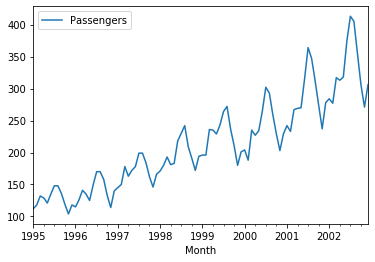

In [3]:
df.plot()
plt.show()

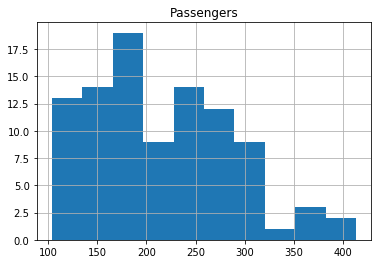

In [4]:
#From the above line diagram, the data is having Upward Exponentional Trend with Multiplicative Seasonality
df.hist()
plt.show()

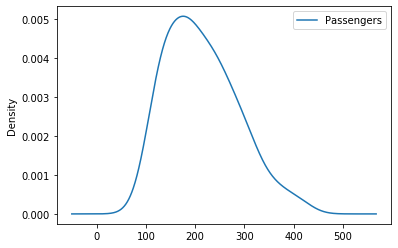

In [5]:
# from the above histogram it is clear that the data is positively skewed.
df.plot(kind='kde')
plt.show()

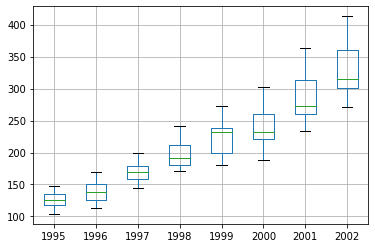

In [6]:
from pandas import Grouper
airlines = pd.read_excel(r"C:\Users\PRANAV\Desktop\lms\Forecasting\Airlines+Data.xlsx", header = 0, index_col = 0, parse_dates = True, squeeze = True)
groups = airlines.groupby(Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

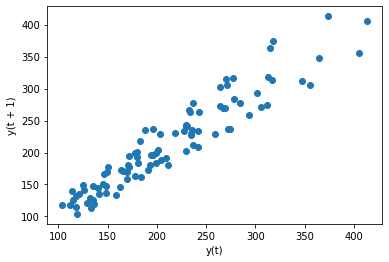

In [7]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


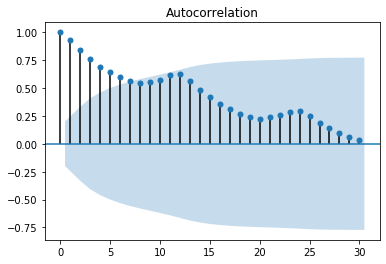

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags = 30)
plt.show()

In [9]:
Train = df.head(84)
Test = df.tail(12)

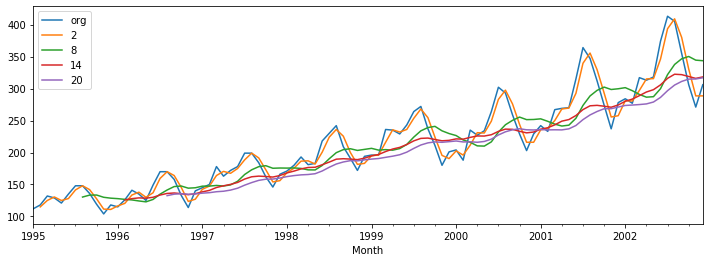

In [10]:
plt.figure(figsize = (12,4))
df['Passengers'].plot(label='org')
for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc = 'best')

<function matplotlib.pyplot.show(*args, **kw)>

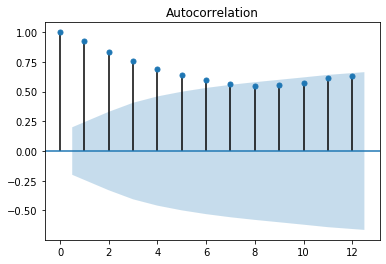

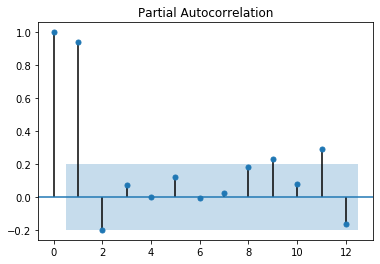

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Passengers'], lags = 12)
tsa_plots.plot_pacf(df['Passengers'], lags = 12)
plt.show

In [12]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [13]:
def rmse(pred):
    rmse = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred))**2))
    return rmse

In [14]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [15]:
# Simple Exponential Method
import warnings
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
print('MAPE Value for the Simple Exponential Model is:',MAPE(pred_ses, Test['Passengers']))
print('rmse value for the model is:',rmse(pred_ses))

MAPE Value for the Simple Exponential Model is: 13.411274740513653
rmse value for the model is: 64.84476396990432


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
# Holt's Method
hw_model = Holt(Train['Passengers']).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the Holt model is:', MAPE(pred_hw, Test['Passengers']))
print('The rmse value for the model is:', rmse(pred_hw))

The MAPE value for the Holt model is: 23.530719652101226
The rmse value for the model is: 95.76674452675468


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
# Holt's Winter exponential smoothing with addaptive seasonality and additive trend
hw_model_add_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods =12).fit()
pred_hw_add_add = hw_model_add_add.predict(start = Test.index[0], end= Test.index[-1])
print('The MAPE value for the model is:', MAPE(pred_hw_add_add, Test['Passengers']))
print('The rmse value for the model is:', rmse(pred_hw_add_add))

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The MAPE value for the model is: 1.6177581813138877
The rmse value for the model is: 7.972745761478444


C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [18]:
# Holt's WInter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_model_mul_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
print('The MAPE value for the model is :', MAPE(pred_hw_mul_add, Test['Passengers']))
print('The rmse value for the model is :', rmse(pred_hw_mul_add))

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


The MAPE value for the model is : 2.511294590134012
The rmse value for the model is : 11.522195174365352


In [19]:
hwe_model_add_add = ExponentialSmoothing(df['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [20]:
hwe_model_add_add.forecast(10)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060923
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762460
2003-10-01    336.170254
Freq: MS, dtype: float64

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  
model = SARIMAX(Train['Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -261.892
Date:                            Thu, 08 Apr 2021   AIC                            533.783
Time:                                    17:08:19   BIC                            545.096
Sample:                                01-01-1995   HQIC                           538.282
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2146      0.112     -1.914      0.056      -0.434       0.005
ar.S.L12      -1.2045      0.875     -1.376      0.169      -2.920       0.511
ar.S.L24      -0.3645      0.246     -1.481      0.139      -0.847       0.118
ma.S.L12       0.9997    329.363      0.003      0.998    -644.540     646.539
sigma2        83.3524   2.74e+04      0.003      0.998   -5.36e+04    5.38e+04
===================================================================================
Ljung-Box (Q):                       26.87   Jarque-Bera (JB):                 2.45
Prob(Q):                              0.94   Prob(JB):                         0.29
Heteroskedasticity (H):               2.52   Skew:                             0.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

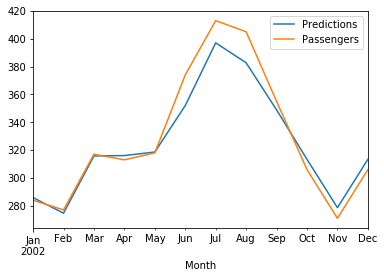

In [22]:
predictions = result.predict(start = Test.index[0], end = Test.index[-1], typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
Test['Passengers'].plot(legend = True)

In [23]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(Test["Passengers"], predictions)
mean_squared_error(Test["Passengers"], predictions)

121.59765685904533

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


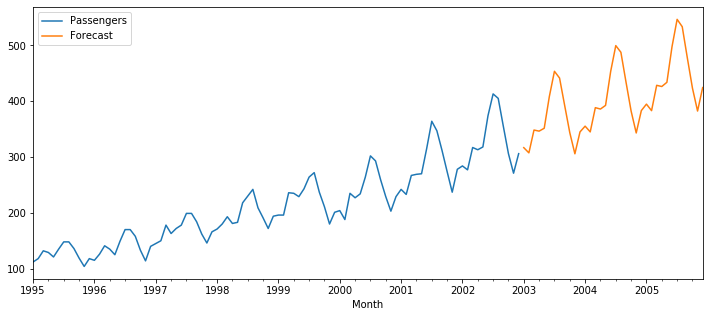

In [24]:
model = model = SARIMAX(df['Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
forecast = result.predict(start = len(df), end = (len(df)-1) + 3 * 12, typ = 'levels').rename('Forecast')
df['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [25]:
forecast.head(10)

2003-01-01    316.742546
2003-02-01    307.407924
2003-03-01    348.275825
2003-04-01    346.343427
2003-05-01    351.497394
2003-06-01    408.233217
2003-07-01    453.498058
2003-08-01    441.428653
2003-09-01    392.282903
2003-10-01    343.648342
Freq: MS, Name: Forecast, dtype: float64

In [26]:
MAPE(predictions, Test['Passengers'])

2.3063759299501227

In [27]:
data = {'MODEL': pd.Series(['MAPE_Simple_Exponential', 'MAPE_Holts', 'MAPE_holts_winter_add_add', 'MAPE_holts_winter_mul_add', 'MAPE_ARIMA']), 
        "MAPE_values":pd.Series([MAPE(pred_ses,Test.Passengers), MAPE(pred_hw,Test.Passengers), MAPE(pred_hw_add_add,Test.Passengers), MAPE(pred_hw_mul_add,Test.Passengers), MAPE(predictions, Test.Passengers)])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

,MODEL,MAPE_values
2,MAPE_holts_winter_add_add,1.617758
4,MAPE_ARIMA,2.306376
3,MAPE_holts_winter_mul_add,2.511295
0,MAPE_Simple_Exponential,13.411275
1,MAPE_Holts,23.530720


In [28]:
# From the above table we can say that Holt's Winter Exponential Smoothing with additive seasonality and trend model is best suitable for the Airlines Data